<a href="https://colab.research.google.com/github/Anusri-J/Nutrition_Paradox/blob/main/Nutrition_Paradox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Dataset Collection and Initial Processing**

In [98]:
!pip install pycountry

In [99]:
import requests
import pandas as pd
import pycountry

In [100]:
urls = {
    "obesity_adult": "https://ghoapi.azureedge.net/api/NCD_BMI_30C",
    "obesity_child": "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C",
    "malnutrition_adult": "https://ghoapi.azureedge.net/api/NCD_BMI_18C",
    "malnutrition_child": "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"
}

In [101]:
def fetch_data(url):
  result = requests.get(url)
  data = result.json()
  df = pd.DataFrame(data['value'])
  return df

In [102]:
# Load all datasets
df_obesity_adult = fetch_data(urls['obesity_adult'])
df_obesity_child = fetch_data(urls['obesity_child'])
df_malnutrition_adult = fetch_data(urls['malnutrition_adult'])
df_malnutrition_child = fetch_data(urls['malnutrition_child'])

# Add age_group column
df_obesity_adult['age_group'] = 'Adult'
df_obesity_child['age_group'] = 'Child'
df_malnutrition_adult['age_group'] = 'Adult'
df_malnutrition_child['age_group'] = 'Child'

In [103]:
# Combine datasets
df_obesity = pd.concat([df_obesity_adult, df_obesity_child])
df_malnutrition = pd.concat([df_malnutrition_adult, df_malnutrition_child])

In [104]:
# Filter years (2012-2022)
df_obesity = df_obesity[df_obesity['TimeDim'].between(2012, 2022)]
df_malnutrition = df_malnutrition[df_malnutrition['TimeDim'].between(2012, 2022)]

In [105]:
df_obesity

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
2,1333520,NCD_BMI_30C,COUNTRY,MKD,YEAR,EUR,Europe,SEX,SEX_FMLE,2012,...,26.0 [19.8-32.5],25.990647,19.781919,32.539630,None,2024-02-29T16:06:41.017+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00,Adult
3,1333721,NCD_BMI_30C,COUNTRY,FJI,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2020,...,32.5 [27.6-37.6],32.471633,27.618340,37.575892,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Adult
11,365,NCD_BMI_30C,COUNTRY,IRN,YEAR,EMR,Eastern Mediterranean,SEX,SEX_MLE,2020,...,17.5 [15.8-19.2],17.487641,15.793777,19.245727,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Adult
18,4924,NCD_BMI_30C,COUNTRY,IRQ,YEAR,EMR,Eastern Mediterranean,SEX,SEX_MLE,2020,...,28.3 [23.1-33.8],28.335530,23.089589,33.815336,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Adult
24,6539,NCD_BMI_30C,COUNTRY,GRL,YEAR,EUR,Europe,SEX,SEX_FMLE,2014,...,27.9 [24.9-31.2],27.948704,24.924766,31.213260,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62347,10152953,NCD_BMI_PLUS2C,COUNTRY,TJK,YEAR,EUR,Europe,SEX,SEX_BTSX,2020,...,1.5 [1.0-2.2],1.475931,0.964176,2.197432,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Child
62350,10153860,NCD_BMI_PLUS2C,COUNTRY,SOM,YEAR,EMR,Eastern Mediterranean,SEX,SEX_FMLE,2012,...,2.0 [0.3-5.9],1.966190,0.302039,5.872414,None,2024-02-29T16:06:41.017+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00,Child
62358,10155386,NCD_BMI_PLUS2C,COUNTRY,VUT,YEAR,WPR,Western Pacific,SEX,SEX_MLE,2021,...,16.6 [3.3-34.9],16.634887,3.325899,34.877816,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,Child
62361,10155854,NCD_BMI_PLUS2C,COUNTRY,MDG,YEAR,AFR,Africa,SEX,SEX_MLE,2014,...,2.0 [0.2-6.3],2.032189,0.236481,6.341185,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00,Child


In [106]:
df_malnutrition

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,1333961,NCD_BMI_18C,COUNTRY,TON,YEAR,WPR,Western Pacific,SEX,2013,SEX_FMLE,...,0.3 [0.1-0.6],0.256721,0.076958,0.633195,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00,Adult
5,54,NCD_BMI_18C,COUNTRY,GAB,YEAR,AFR,Africa,SEX,2021,SEX_FMLE,...,5.8 [4.0-8.1],5.795110,3.972036,8.077021,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,Adult
9,2278,NCD_BMI_18C,COUNTRY,MNG,YEAR,WPR,Western Pacific,SEX,2017,SEX_BTSX,...,3.1 [2.4-3.8],3.090652,2.428230,3.842155,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,Adult
10,2592,NCD_BMI_18C,COUNTRY,SLE,YEAR,AFR,Africa,SEX,2016,SEX_FMLE,...,8.4 [6.7-10.3],8.371724,6.655668,10.253121,None,2024-02-29T16:06:41.017+01:00,2016,2016-01-01T00:00:00+01:00,2016-12-31T00:00:00+01:00,Adult
12,4127,NCD_BMI_18C,REGION,SEAR,YEAR,None,None,SEX,2021,SEX_BTSX,...,13.3 [12.2-14.4],13.336353,12.242323,14.442866,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62357,10153745,NCD_BMI_MINUS2C,COUNTRY,HTI,YEAR,AMR,Americas,SEX,2013,SEX_FMLE,...,4.1 [2.8-5.7],4.140693,2.795499,5.714345,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00,Child
62359,10154761,NCD_BMI_MINUS2C,COUNTRY,TJK,YEAR,EUR,Europe,SEX,2018,SEX_BTSX,...,7.6 [5.4-10.2],7.574986,5.428173,10.218395,None,2024-02-29T16:06:41.017+01:00,2018,2018-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,Child
62360,10154903,NCD_BMI_MINUS2C,COUNTRY,PNG,YEAR,WPR,Western Pacific,SEX,2016,SEX_BTSX,...,1.7 [0.6-3.5],1.703645,0.621721,3.507061,None,2024-02-29T16:06:41.017+01:00,2016,2016-01-01T00:00:00+01:00,2016-12-31T00:00:00+01:00,Child
62366,10156036,NCD_BMI_MINUS2C,COUNTRY,WSM,YEAR,WPR,Western Pacific,SEX,2020,SEX_FMLE,...,0.7 [0.1-2.8],0.734066,0.064152,2.810176,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Child


**Step 2: Data Cleaning and Feature Engineering**

In [107]:
# Select and rename columns
columns_to_keep = ['ParentLocation', 'Dim1', 'TimeDim', 'Low', 'High', 'NumericValue', 'SpatialDim', 'age_group']
rename_dict = {
    'TimeDim': 'Year',
    'Dim1': 'Gender',
    'NumericValue': 'Mean_Estimate',
    'Low': 'LowerBound',
    'High': 'UpperBound',
    'ParentLocation': 'Region',
    'SpatialDim': 'Country'
}

In [108]:
df_obesity.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim', 'TimeDimType',
       'ParentLocationCode', 'ParentLocation', 'Dim1Type', 'Dim1', 'TimeDim',
       'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3', 'DataSourceDimType',
       'DataSourceDim', 'Value', 'NumericValue', 'Low', 'High', 'Comments',
       'Date', 'TimeDimensionValue', 'TimeDimensionBegin', 'TimeDimensionEnd',
       'age_group'],
      dtype='object')

In [109]:
df_malnutrition.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim', 'TimeDimType',
       'ParentLocationCode', 'ParentLocation', 'Dim1Type', 'TimeDim', 'Dim1',
       'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3', 'DataSourceDimType',
       'DataSourceDim', 'Value', 'NumericValue', 'Low', 'High', 'Comments',
       'Date', 'TimeDimensionValue', 'TimeDimensionBegin', 'TimeDimensionEnd',
       'age_group'],
      dtype='object')

In [110]:
# Apply column selection and renaming
df_obesity = df_obesity[columns_to_keep].rename(columns=rename_dict)
df_malnutrition = df_malnutrition[columns_to_keep].rename(columns=rename_dict)

In [111]:
df_obesity

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group
2,Europe,SEX_FMLE,2012,19.781919,32.539630,25.990647,MKD,Adult
3,Western Pacific,SEX_BTSX,2020,27.618340,37.575892,32.471633,FJI,Adult
11,Eastern Mediterranean,SEX_MLE,2020,15.793777,19.245727,17.487641,IRN,Adult
18,Eastern Mediterranean,SEX_MLE,2020,23.089589,33.815336,28.335530,IRQ,Adult
24,Europe,SEX_FMLE,2014,24.924766,31.213260,27.948704,GRL,Adult
...,...,...,...,...,...,...,...,...
62347,Europe,SEX_BTSX,2020,0.964176,2.197432,1.475931,TJK,Child
62350,Eastern Mediterranean,SEX_FMLE,2012,0.302039,5.872414,1.966190,SOM,Child
62358,Western Pacific,SEX_MLE,2021,3.325899,34.877816,16.634887,VUT,Child
62361,Africa,SEX_MLE,2014,0.236481,6.341185,2.032189,MDG,Child


In [112]:
df_malnutrition

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group
0,Western Pacific,SEX_FMLE,2013,0.076958,0.633195,0.256721,TON,Adult
5,Africa,SEX_FMLE,2021,3.972036,8.077021,5.795110,GAB,Adult
9,Western Pacific,SEX_BTSX,2017,2.428230,3.842155,3.090652,MNG,Adult
10,Africa,SEX_FMLE,2016,6.655668,10.253121,8.371724,SLE,Adult
12,None,SEX_BTSX,2021,12.242323,14.442866,13.336353,SEAR,Adult
...,...,...,...,...,...,...,...,...
62357,Americas,SEX_FMLE,2013,2.795499,5.714345,4.140693,HTI,Child
62359,Europe,SEX_BTSX,2018,5.428173,10.218395,7.574986,TJK,Child
62360,Western Pacific,SEX_BTSX,2016,0.621721,3.507061,1.703645,PNG,Child
62366,Western Pacific,SEX_FMLE,2020,0.064152,2.810176,0.734066,WSM,Child


In [113]:
# Standardize gender values
gender_mapping = {'SEX_MLE': 'Male', 'SEX_FMLE': 'Female', 'SEX_BTSX': 'Both'}
df_obesity['Gender'] = df_obesity['Gender'].map(gender_mapping).fillna(df_obesity['Gender'])
df_malnutrition['Gender'] = df_malnutrition['Gender'].map(gender_mapping).fillna(df_malnutrition['Gender'])

In [114]:
# Convert country codes to names
def code_to_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        special_cases = {
            'GLOBAL': 'Global',
            'WB_LMI': 'Low & Middle Income',
            'WB_HI': 'High Income',
            'WB_LI': 'Low Income',
            'EMR': 'Eastern Mediterranean Region',
            'EUR': 'Europe',
            'AFR': 'Africa',
            'SEAR': 'South-East Asia Region',
            'WPR': 'Western Pacific Region',
            'AMR': 'Americas Region',
            'WB_UMI': 'Upper Middle Income'
        }
        return special_cases.get(code, code)

In [115]:
df_obesity['Country'] = df_obesity['Country'].apply(code_to_name)
df_malnutrition['Country'] = df_malnutrition['Country'].apply(code_to_name)

In [116]:
# Create CI_Width column
# Fill missing bounds with Mean_Estimate first
df_obesity["LowerBound"] = df_obesity["LowerBound"].fillna(df_obesity["Mean_Estimate"])
df_obesity["UpperBound"] = df_obesity["UpperBound"].fillna(df_obesity["Mean_Estimate"])

df_malnutrition["LowerBound"] = df_malnutrition["LowerBound"].fillna(df_malnutrition["Mean_Estimate"])
df_malnutrition["UpperBound"] = df_malnutrition["UpperBound"].fillna(df_malnutrition["Mean_Estimate"])

df_obesity['CI_Width'] = df_obesity['UpperBound'] - df_obesity['LowerBound']
df_malnutrition['CI_Width'] = df_malnutrition['UpperBound'] - df_malnutrition['LowerBound']


In [117]:
df_obesity

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width
2,Europe,Female,2012,19.781919,32.539630,25.990647,North Macedonia,Adult,12.757711
3,Western Pacific,Both,2020,27.618340,37.575892,32.471633,Fiji,Adult,9.957552
11,Eastern Mediterranean,Male,2020,15.793777,19.245727,17.487641,"Iran, Islamic Republic of",Adult,3.451950
18,Eastern Mediterranean,Male,2020,23.089589,33.815336,28.335530,Iraq,Adult,10.725747
24,Europe,Female,2014,24.924766,31.213260,27.948704,Greenland,Adult,6.288494
...,...,...,...,...,...,...,...,...,...
62347,Europe,Both,2020,0.964176,2.197432,1.475931,Tajikistan,Child,1.233255
62350,Eastern Mediterranean,Female,2012,0.302039,5.872414,1.966190,Somalia,Child,5.570375
62358,Western Pacific,Male,2021,3.325899,34.877816,16.634887,Vanuatu,Child,31.551917
62361,Africa,Male,2014,0.236481,6.341185,2.032189,Madagascar,Child,6.104704


In [118]:
df_malnutrition

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width
0,Western Pacific,Female,2013,0.076958,0.633195,0.256721,Tonga,Adult,0.556237
5,Africa,Female,2021,3.972036,8.077021,5.795110,Gabon,Adult,4.104985
9,Western Pacific,Both,2017,2.428230,3.842155,3.090652,Mongolia,Adult,1.413925
10,Africa,Female,2016,6.655668,10.253121,8.371724,Sierra Leone,Adult,3.597453
12,None,Both,2021,12.242323,14.442866,13.336353,South-East Asia Region,Adult,2.200543
...,...,...,...,...,...,...,...,...,...
62357,Americas,Female,2013,2.795499,5.714345,4.140693,Haiti,Child,2.918846
62359,Europe,Both,2018,5.428173,10.218395,7.574986,Tajikistan,Child,4.790222
62360,Western Pacific,Both,2016,0.621721,3.507061,1.703645,Papua New Guinea,Child,2.885340
62366,Western Pacific,Female,2020,0.064152,2.810176,0.734066,Samoa,Child,2.746023


In [119]:
# Create obesity_level and malnutrition_level categories
def categorize_obesity(value):
    if value >= 30:
      return 'High'
    elif value >= 25:
      return 'Moderate'
    else:
      return 'Low'

def categorize_malnutrition(value):
    if value >= 20:
      return 'High'
    elif value >= 10:
      return 'Moderate'
    else:
      return 'Low'

df_obesity['obesity_level'] = df_obesity['Mean_Estimate'].apply(categorize_obesity)
df_malnutrition['malnutrition_level'] = df_malnutrition['Mean_Estimate'].apply(categorize_malnutrition)

In [120]:
df_obesity

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,obesity_level
2,Europe,Female,2012,19.781919,32.539630,25.990647,North Macedonia,Adult,12.757711,Moderate
3,Western Pacific,Both,2020,27.618340,37.575892,32.471633,Fiji,Adult,9.957552,High
11,Eastern Mediterranean,Male,2020,15.793777,19.245727,17.487641,"Iran, Islamic Republic of",Adult,3.451950,Low
18,Eastern Mediterranean,Male,2020,23.089589,33.815336,28.335530,Iraq,Adult,10.725747,Moderate
24,Europe,Female,2014,24.924766,31.213260,27.948704,Greenland,Adult,6.288494,Moderate
...,...,...,...,...,...,...,...,...,...,...
62347,Europe,Both,2020,0.964176,2.197432,1.475931,Tajikistan,Child,1.233255,Low
62350,Eastern Mediterranean,Female,2012,0.302039,5.872414,1.966190,Somalia,Child,5.570375,Low
62358,Western Pacific,Male,2021,3.325899,34.877816,16.634887,Vanuatu,Child,31.551917,Low
62361,Africa,Male,2014,0.236481,6.341185,2.032189,Madagascar,Child,6.104704,Low


In [121]:
df_malnutrition

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
0,Western Pacific,Female,2013,0.076958,0.633195,0.256721,Tonga,Adult,0.556237,Low
5,Africa,Female,2021,3.972036,8.077021,5.795110,Gabon,Adult,4.104985,Low
9,Western Pacific,Both,2017,2.428230,3.842155,3.090652,Mongolia,Adult,1.413925,Low
10,Africa,Female,2016,6.655668,10.253121,8.371724,Sierra Leone,Adult,3.597453,Low
12,None,Both,2021,12.242323,14.442866,13.336353,South-East Asia Region,Adult,2.200543,Moderate
...,...,...,...,...,...,...,...,...,...,...
62357,Americas,Female,2013,2.795499,5.714345,4.140693,Haiti,Child,2.918846,Low
62359,Europe,Both,2018,5.428173,10.218395,7.574986,Tajikistan,Child,4.790222,Low
62360,Western Pacific,Both,2016,0.621721,3.507061,1.703645,Papua New Guinea,Child,2.885340,Low
62366,Western Pacific,Female,2020,0.064152,2.810176,0.734066,Samoa,Child,2.746023,Low


In [122]:
print("\nMissing Values in Obesity Data:")
print(df_obesity.isnull().sum())


Missing Values in Obesity Data:
Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
age_group           0
CI_Width            0
obesity_level       0
dtype: int64


In [123]:
print("\nMissing Values in Malnutrition Data:")
print(df_malnutrition.isnull().sum())


Missing Values in Malnutrition Data:
Region                1452
Gender                   0
Year                     0
LowerBound               0
UpperBound               0
Mean_Estimate            0
Country                  0
age_group                0
CI_Width                 0
malnutrition_level       0
dtype: int64


In [124]:
df_obesity['Region'].unique()

array(['Europe', 'Western Pacific', 'Eastern Mediterranean', 'Americas',
       'South-East Asia', 'Africa', None], dtype=object)

In [125]:
df_malnutrition['Region'].unique()

array(['Western Pacific', 'Africa', None, 'Eastern Mediterranean',
       'Europe', 'Americas', 'South-East Asia'], dtype=object)

In [126]:
df_malnutrition[df_malnutrition['Country']=='Global']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
2544,None,Male,2019,6.920451,7.824215,7.369630,Global,Adult,0.903764,Low
2725,None,Female,2016,8.645694,9.234868,8.944437,Global,Adult,0.589174,Low
3736,None,Male,2022,6.116152,7.402007,6.738611,Global,Adult,1.285855,Low
4200,None,Female,2015,8.935650,9.500933,9.222165,Global,Adult,0.565283,Low
4253,None,Male,2014,8.300319,8.980735,8.640486,Global,Adult,0.680416,Low
...,...,...,...,...,...,...,...,...,...,...
58403,None,Male,2013,10.283919,11.492490,10.871921,Global,Child,1.208571,Moderate
58619,None,Female,2013,8.659063,9.449733,9.051900,Global,Child,0.790670,Low
59511,None,Both,2022,7.793578,9.163310,8.470054,Global,Child,1.369732,Low
61869,None,Male,2013,12.581274,13.605259,13.091414,Global,Child,1.023985,Moderate


In [127]:
df_malnutrition[df_malnutrition['Country']=='Low & Middle Income']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
635,None,Female,2015,14.497598,15.770014,15.132982,Low & Middle Income,Adult,1.272416,Moderate
2125,None,Male,2022,9.565641,12.309398,10.892023,Low & Middle Income,Adult,2.743757,Moderate
2266,None,Female,2018,12.529334,14.047663,13.280097,Low & Middle Income,Adult,1.518329,Moderate
3655,None,Female,2020,11.239915,13.051857,12.120827,Low & Middle Income,Adult,1.811942,Moderate
3660,None,Female,2019,11.886558,13.533695,12.691998,Low & Middle Income,Adult,1.647137,Moderate
...,...,...,...,...,...,...,...,...,...,...
58561,None,Female,2022,11.230196,14.405634,12.785350,Low & Middle Income,Child,3.175438,Moderate
58570,None,Male,2019,16.434821,19.057849,17.735513,Low & Middle Income,Child,2.623028,Moderate
59523,None,Both,2017,14.103849,15.711166,14.893246,Low & Middle Income,Child,1.607317,Moderate
61141,None,Male,2021,16.607447,20.186712,18.404867,Low & Middle Income,Child,3.579265,Moderate


In [128]:
df_malnutrition[df_malnutrition['Country']=='High Income']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
334,None,Male,2022,1.414936,2.034169,1.695957,High Income,Adult,0.619234,Low
505,None,Female,2020,3.618668,4.306085,3.955827,High Income,Adult,0.687417,Low
563,None,Male,2016,1.499699,1.764064,1.627807,High Income,Adult,0.264365,Low
2469,None,Male,2012,1.547178,1.768012,1.654344,High Income,Adult,0.220833,Low
2762,None,Both,2019,2.631055,2.995184,2.814202,High Income,Adult,0.364129,Low
...,...,...,...,...,...,...,...,...,...,...
60393,None,Both,2017,1.862438,2.218669,2.033405,High Income,Child,0.356231,Low
60670,None,Female,2015,1.651659,1.947998,1.795560,High Income,Child,0.296339,Low
60883,None,Both,2015,2.100058,2.337939,2.218331,High Income,Child,0.237881,Low
61328,None,Both,2014,1.815294,2.077799,1.942599,High Income,Child,0.262505,Low


In [129]:
df_malnutrition[df_malnutrition['Country']=='Low Income']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
52,None,Both,2017,14.133340,15.932868,15.019259,Low Income,Adult,1.799528,Moderate
103,None,Both,2012,14.959377,16.639748,15.779784,Low Income,Adult,1.680371,Moderate
1885,None,Female,2015,13.687909,15.819150,14.662607,Low Income,Adult,2.131241,Moderate
2839,None,Male,2022,12.980227,17.447124,15.164082,Low Income,Adult,4.466897,Moderate
4348,None,Both,2022,13.021666,15.740852,14.340118,Low Income,Adult,2.719186,Moderate
...,...,...,...,...,...,...,...,...,...,...
58886,None,Both,2012,11.349364,13.120310,12.226232,Low Income,Child,1.770946,Moderate
59872,None,Female,2017,4.880706,7.806219,6.225035,Low Income,Child,2.925514,Low
61153,None,Both,2015,9.356274,11.195049,10.248134,Low Income,Child,1.838775,Moderate
61930,None,Both,2016,9.207854,11.088397,10.127594,Low Income,Child,1.880543,Moderate


In [130]:
df_malnutrition[df_malnutrition['Country']=='Eastern Mediterranean Region']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
709,None,Both,2015,6.899321,7.861376,7.372539,Eastern Mediterranean Region,Adult,0.962055,Low
1565,None,Female,2022,5.280538,7.032107,6.104935,Eastern Mediterranean Region,Adult,1.751569,Low
1636,None,Male,2018,6.026900,7.737064,6.854895,Eastern Mediterranean Region,Adult,1.710164,Low
1700,None,Male,2014,7.074486,8.561544,7.796536,Eastern Mediterranean Region,Adult,1.487058,Low
1953,None,Male,2015,6.816235,8.315000,7.536170,Eastern Mediterranean Region,Adult,1.498765,Low
...,...,...,...,...,...,...,...,...,...,...
58854,None,Male,2020,8.215380,12.056778,10.058476,Eastern Mediterranean Region,Child,3.841398,Moderate
59159,None,Both,2013,9.623681,11.708430,10.643808,Eastern Mediterranean Region,Child,2.084749,Moderate
60715,None,Female,2013,8.244307,10.459407,9.328479,Eastern Mediterranean Region,Child,2.215100,Low
62110,None,Female,2014,8.120230,10.253397,9.158864,Eastern Mediterranean Region,Child,2.133167,Low


In [131]:
df_malnutrition[df_malnutrition['Country']=='Europe']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
731,None,Male,2019,1.082619,1.458406,1.254934,Europe,Adult,0.375787,Low
880,None,Both,2014,2.047640,2.299514,2.171441,Europe,Adult,0.251874,Low
1374,None,Female,2018,2.645484,3.184721,2.902337,Europe,Adult,0.539237,Low
1421,None,Male,2014,1.144815,1.406293,1.266274,Europe,Adult,0.261478,Low
2075,None,Female,2015,2.755870,3.196967,2.969627,Europe,Adult,0.441097,Low
...,...,...,...,...,...,...,...,...,...,...
57967,None,Male,2012,2.052357,2.670358,2.337757,Europe,Child,0.618001,Low
58275,None,Both,2019,2.342961,2.923231,2.612277,Europe,Child,0.580270,Low
60744,None,Male,2020,2.956027,3.927544,3.410694,Europe,Child,0.971517,Low
60814,None,Both,2015,2.515677,2.910694,2.710905,Europe,Child,0.395017,Low


In [132]:
df_malnutrition[df_malnutrition['Country']=='Africa']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
274,None,Male,2018,11.748413,13.960633,12.832575,Africa,Adult,2.212220,Moderate
779,None,Female,2012,10.921007,11.990743,11.456142,Africa,Adult,1.069736,Moderate
1530,None,Both,2021,10.716087,12.573370,11.622927,Africa,Adult,1.857283,Moderate
1661,None,Male,2019,11.566492,14.059576,12.779571,Africa,Adult,2.493084,Moderate
2330,None,Both,2014,11.691500,12.710446,12.200485,Africa,Adult,1.018946,Moderate
...,...,...,...,...,...,...,...,...,...,...
57352,None,Male,2013,6.746093,10.106917,8.344949,Africa,Child,3.360824,Low
57516,None,Male,2018,10.483588,13.806975,12.086450,Africa,Child,3.323387,Moderate
57868,None,Male,2017,10.614904,13.711847,12.112924,Africa,Child,3.096943,Moderate
58302,None,Male,2015,6.574270,9.954669,8.198428,Africa,Child,3.380399,Low


In [133]:
df_malnutrition[df_malnutrition['Country']=='South-East Asia Region']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
12,None,Both,2021,12.242323,14.442866,13.336353,South-East Asia Region,Adult,2.200543,Moderate
87,None,Male,2022,10.757288,14.521302,12.599573,South-East Asia Region,Adult,3.764014,Moderate
1395,None,Female,2021,12.003449,14.824846,13.398549,South-East Asia Region,Adult,2.821397,Moderate
1407,None,Both,2014,18.004781,19.380148,18.692881,South-East Asia Region,Adult,1.375367,Moderate
1730,None,Female,2014,17.987743,19.775642,18.881068,South-East Asia Region,Adult,1.787899,Moderate
...,...,...,...,...,...,...,...,...,...,...
53523,None,Male,2013,21.277663,24.347040,22.787920,South-East Asia Region,Child,3.069377,High
54446,None,Male,2016,22.111949,24.810441,23.464893,South-East Asia Region,Child,2.698492,High
55846,None,Female,2017,15.760636,18.381938,17.063586,South-East Asia Region,Child,2.621302,Moderate
58655,None,Male,2014,24.934335,27.442363,26.187947,South-East Asia Region,Child,2.508028,High


In [134]:
df_malnutrition[df_malnutrition['Country']=='Western Pacific Region']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
1051,None,Male,2022,2.939331,4.740157,3.764646,Western Pacific Region,Adult,1.800826,Low
1545,None,Male,2017,4.158256,5.173146,4.638354,Western Pacific Region,Adult,1.014890,Low
1725,None,Male,2013,5.158663,5.975701,5.557563,Western Pacific Region,Adult,0.817038,Low
1886,None,Female,2021,5.748624,7.683258,6.665893,Western Pacific Region,Adult,1.934634,Low
2408,None,Female,2015,7.449186,8.387950,7.908642,Western Pacific Region,Adult,0.938764,Low
...,...,...,...,...,...,...,...,...,...,...
59504,None,Both,2018,4.636526,5.508594,5.050819,Western Pacific Region,Child,0.872068,Low
60108,None,Male,2017,3.532989,4.451957,3.988677,Western Pacific Region,Child,0.918968,Low
61514,None,Both,2020,3.426318,4.423630,3.900499,Western Pacific Region,Child,0.997312,Low
61936,None,Both,2019,4.944556,6.030680,5.463954,Western Pacific Region,Child,1.086124,Low


In [135]:
df_malnutrition[df_malnutrition['Country']=='Americas Region']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
297,None,Female,2012,2.641677,3.013068,2.827968,Americas Region,Adult,0.371391,Low
970,None,Male,2020,1.652800,2.276805,1.946104,Americas Region,Adult,0.624005,Low
1366,None,Female,2014,2.553190,2.928975,2.739724,Americas Region,Adult,0.375785,Low
2043,None,Both,2018,2.081403,2.416906,2.245581,Americas Region,Adult,0.335503,Low
3282,None,Both,2019,2.046459,2.421101,2.229819,Americas Region,Adult,0.374642,Low
...,...,...,...,...,...,...,...,...,...,...
60021,None,Male,2017,1.605327,2.100862,1.833677,Americas Region,Child,0.495535,Low
60235,None,Male,2022,1.648301,2.512472,2.043067,Americas Region,Child,0.864171,Low
60897,None,Female,2017,1.411783,1.910975,1.635950,Americas Region,Child,0.499192,Low
61175,None,Male,2021,2.033600,2.841163,2.411143,Americas Region,Child,0.807563,Low


In [136]:
df_malnutrition[df_malnutrition['Country']=='Upper Middle Income']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
746,None,Male,2019,3.490343,4.526936,3.985062,Upper Middle Income,Adult,1.036593,Low
2098,None,Both,2017,4.556688,5.138766,4.843767,Upper Middle Income,Adult,0.582078,Low
2923,None,Female,2019,4.539032,5.573590,5.028603,Upper Middle Income,Adult,1.034557,Low
4349,None,Male,2021,3.119400,4.396364,3.714355,Upper Middle Income,Adult,1.276963,Low
4937,None,Both,2014,5.170071,5.648075,5.407046,Upper Middle Income,Adult,0.478005,Low
...,...,...,...,...,...,...,...,...,...,...
59342,None,Female,2013,3.827367,4.426988,4.121973,Upper Middle Income,Child,0.599620,Low
59730,None,Male,2021,4.420488,6.166322,5.242000,Upper Middle Income,Child,1.745834,Low
59762,None,Male,2019,4.715876,5.952748,5.314095,Upper Middle Income,Child,1.236872,Low
60032,None,Female,2013,3.957975,4.627103,4.279238,Upper Middle Income,Child,0.669129,Low


In [137]:
df_obesity["Region"]=df_obesity['Region'].replace({None:'Unknown'})

print("\nMissing Values in Obesity Data:")
print(df_obesity.isnull().sum())


Missing Values in Obesity Data:
Region           0
Gender           0
Year             0
LowerBound       0
UpperBound       0
Mean_Estimate    0
Country          0
age_group        0
CI_Width         0
obesity_level    0
dtype: int64


In [138]:
df_malnutrition["Region"]=df_malnutrition['Region'].replace({None:'Unknown'})

print("\nMissing Values in Malnutrition Data:")
print(df_malnutrition.isnull().sum())


Missing Values in Malnutrition Data:
Region                0
Gender                0
Year                  0
LowerBound            0
UpperBound            0
Mean_Estimate         0
Country               0
age_group             0
CI_Width              0
malnutrition_level    0
dtype: int64


In [139]:
df_obesity[df_obesity['Region']=='Unknown']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,obesity_level
162,Unknown,Female,2016,5.970943,6.696701,6.324915,Western Pacific Region,Adult,0.725758,Low
174,Unknown,Female,2019,24.963759,26.624760,25.783622,High Income,Adult,1.661001,Moderate
258,Unknown,Female,2017,12.172082,12.886313,12.520297,Low & Middle Income,Adult,0.714231,Low
359,Unknown,Female,2022,9.591366,11.653028,10.585164,South-East Asia Region,Adult,2.061662,Low
692,Unknown,Male,2021,29.186985,32.267982,30.725309,Americas Region,Adult,3.080997,High
...,...,...,...,...,...,...,...,...,...,...
61963,Unknown,Male,2020,3.208165,6.375460,4.610661,Low Income,Child,3.167295,Low
61999,Unknown,Male,2020,8.139845,9.995961,9.013220,Europe,Child,1.856116,Low
62017,Unknown,Male,2014,3.995784,5.021876,4.487799,South-East Asia Region,Child,1.026092,Low
62044,Unknown,Male,2022,9.036333,14.086503,11.429928,Eastern Mediterranean Region,Child,5.050170,Low


In [140]:
df_malnutrition[df_malnutrition['Region']=='Unknown']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
12,Unknown,Both,2021,12.242323,14.442866,13.336353,South-East Asia Region,Adult,2.200543,Moderate
52,Unknown,Both,2017,14.133340,15.932868,15.019259,Low Income,Adult,1.799528,Moderate
87,Unknown,Male,2022,10.757288,14.521302,12.599573,South-East Asia Region,Adult,3.764014,Moderate
103,Unknown,Both,2012,14.959377,16.639748,15.779784,Low Income,Adult,1.680371,Moderate
274,Unknown,Male,2018,11.748413,13.960633,12.832575,Africa,Adult,2.212220,Moderate
...,...,...,...,...,...,...,...,...,...,...
62083,Unknown,Both,2019,4.472628,5.476760,4.947923,Western Pacific Region,Child,1.004132,Low
62110,Unknown,Female,2014,8.120230,10.253397,9.158864,Eastern Mediterranean Region,Child,2.133167,Low
62135,Unknown,Both,2015,2.020920,2.258328,2.137077,High Income,Child,0.237409,Low
62301,Unknown,Both,2020,5.992880,8.787237,7.284579,Low Income,Child,2.794357,Low


In [141]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 2 to 62364
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         27720 non-null  object 
 1   Gender         27720 non-null  object 
 2   Year           27720 non-null  int64  
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   Mean_Estimate  27720 non-null  float64
 6   Country        27720 non-null  object 
 7   age_group      27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   obesity_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


**Checking for Duplicates**

In [142]:
df_obesity.duplicated().sum()

np.int64(0)

In [143]:
df_malnutrition.duplicated().sum()

np.int64(0)

**Step 3: Exploratory Data Analysis (EDA) with Python**

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib

**1) Average Obesity Trend Over Years by Region (LINE CHART)**

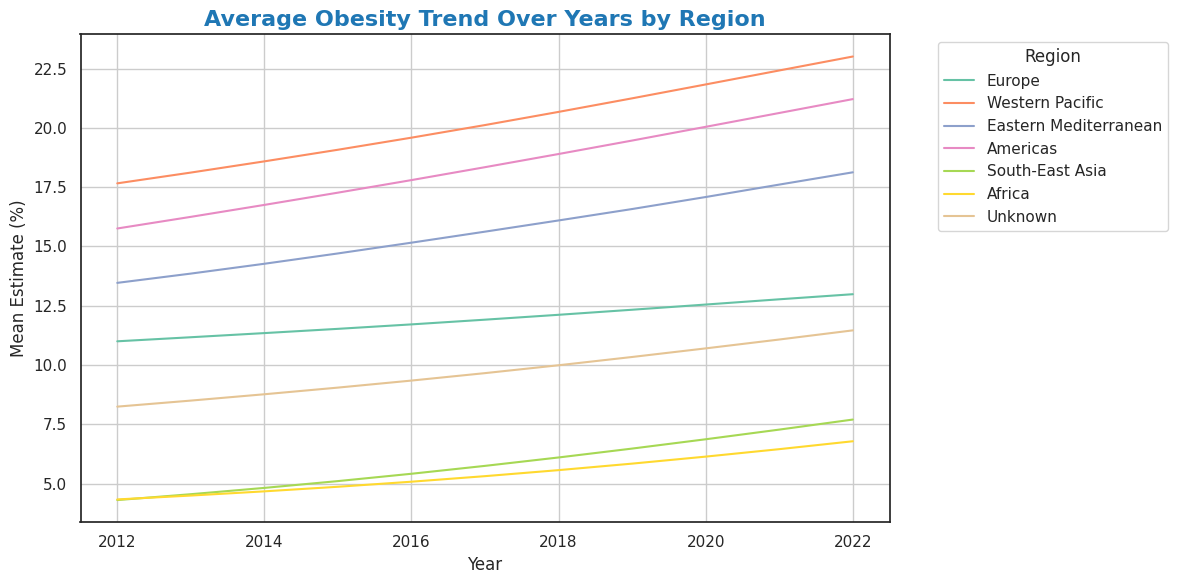

In [145]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_obesity,
    x='Year',
    y='Mean_Estimate',
    hue='Region',
    estimator='mean',
    errorbar=None
)

plt.title(
    'Average Obesity Trend Over Years by Region',
    fontsize=16,
    fontweight='bold',
    color='#1f77b4',
    fontfamily='sans-serif'
)

plt.ylabel('Mean Estimate (%)')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**2) Top 10 Countries with Highest Average Obesity (BAR CHART)**

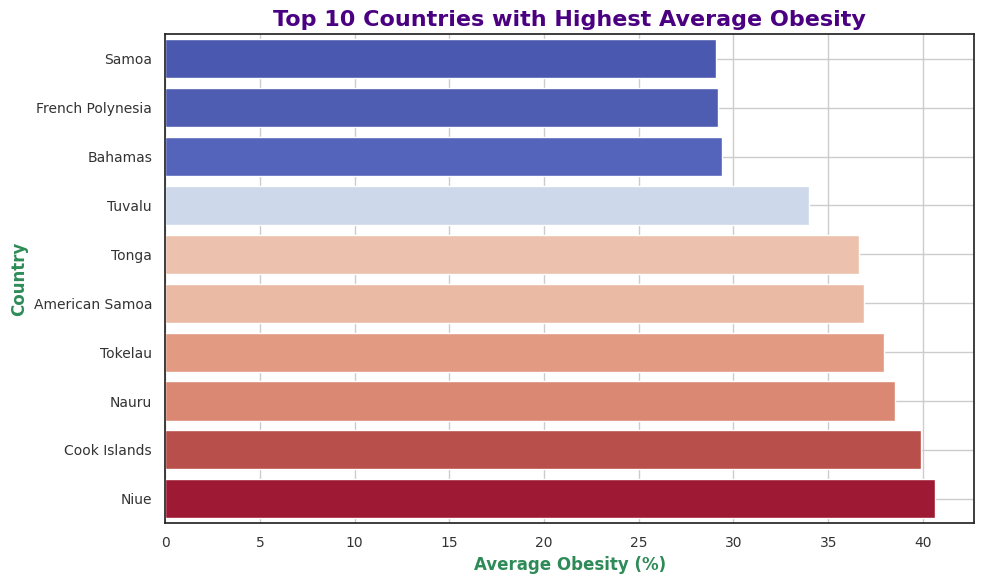

In [146]:
cmap = matplotlib.colormaps['coolwarm']

# Prepare Top 10 countries by obesity
top10_obesity = (
    df_obesity.groupby('Country')['Mean_Estimate']
    .mean()
    .nlargest(10)
    .sort_values()
    .reset_index()
)

# Normalize for color mapping
norm = mcolors.Normalize(
    vmin=top10_obesity['Mean_Estimate'].min(),
    vmax=top10_obesity['Mean_Estimate'].max()
)

# Map each value to a color
top10_obesity['Color'] = [cmap(norm(value)) for value in top10_obesity['Mean_Estimate']]

# Plot using hue instead of palette directly
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_obesity,
    x='Mean_Estimate',
    y='Country',
    hue='Country',             # Needed to use hue mapping
    dodge=False,
    palette=top10_obesity.set_index('Country')['Color'].to_dict(),
    legend=False               # Disable redundant legend
)

# Stylish title and labels
plt.title(
    'Top 10 Countries with Highest Average Obesity',
    fontsize=16,
    fontweight='bold',
    color='#4B0082'
)
plt.xlabel('Average Obesity (%)', fontsize=12, fontweight='bold', color='#2E8B57')
plt.ylabel('Country', fontsize=12, fontweight='bold', color='#2E8B57')
plt.xticks(color='#333333', fontsize=10)
plt.yticks(color='#333333', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

**3) Distribution of Malnutrition by Gender (Box Plot)**

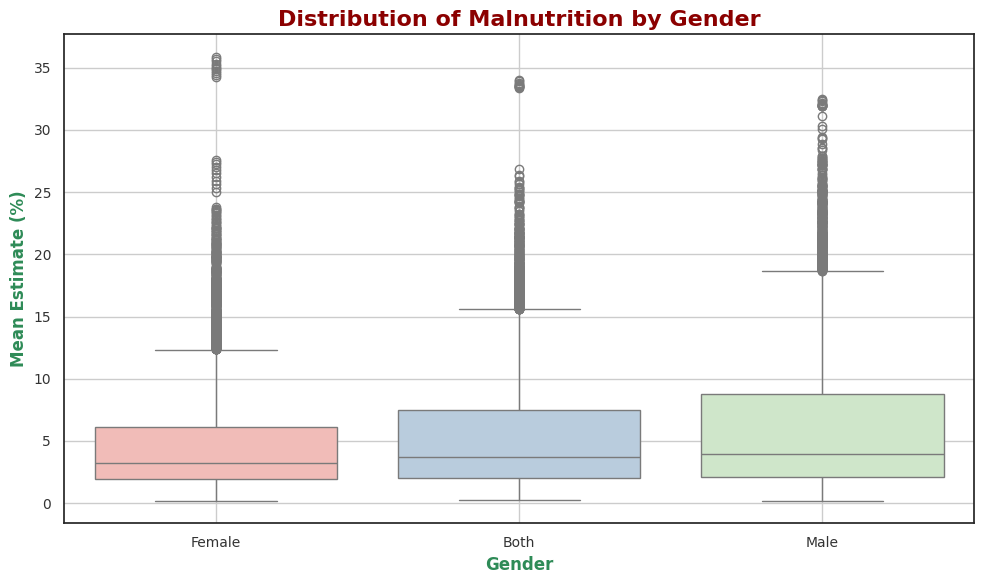

In [147]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_malnutrition,
    x='Gender',
    y='Mean_Estimate',
    hue='Gender',            # Required for palette compatibility
    palette='Pastel1',
    dodge=False              # Prevent double boxes
)

# Title styling
plt.title(
    'Distribution of Malnutrition by Gender',
    fontsize=16,
    fontweight='bold',
    color='#8B0000',
    fontfamily='sans-serif'
)

# Axis labels
plt.ylabel('Mean Estimate (%)', fontsize=12, color='#2E8B57', fontweight='bold')
plt.xlabel('Gender', fontsize=12, color='#2E8B57', fontweight='bold')

# Ticks and grid
plt.xticks(color='#333333', fontsize=10)
plt.yticks(color='#333333', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

**4) Top 10 Countries with Highest Average Obesity (BAR CHART)**

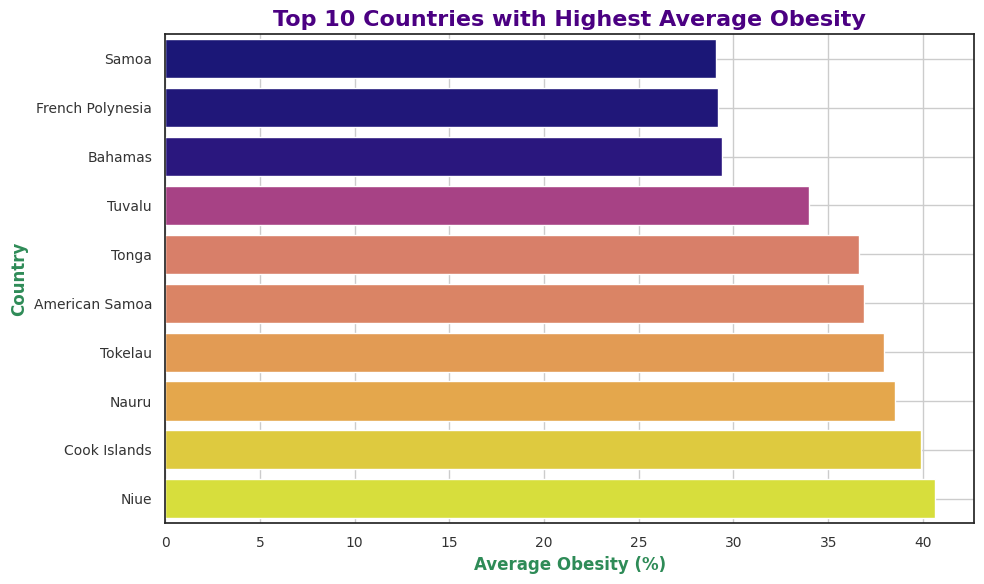

In [148]:
# Group top 10 countries by average obesity
top_obese = (
    df_obesity.groupby('Country')['Mean_Estimate']
    .mean()
    .nlargest(10)
    .reset_index()
    .sort_values(by='Mean_Estimate')  # Optional: reverse bar order
)

# Normalize for color gradient
norm = mcolors.Normalize(
    vmin=top_obese['Mean_Estimate'].min(),
    vmax=top_obese['Mean_Estimate'].max()
)

# Use modern colormap syntax
cmap = matplotlib.colormaps['plasma']
top_obese['Color'] = [cmap(norm(val)) for val in top_obese['Mean_Estimate']]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_obese,
    x='Mean_Estimate',
    y='Country',
    hue='Country',
    dodge=False,
    palette=top_obese.set_index('Country')['Color'].to_dict(),
    legend=False
)

# Styled title and labels
plt.title(
    'Top 10 Countries with Highest Average Obesity',
    fontsize=16,
    fontweight='bold',
    color='#4B0082',
    fontfamily='sans-serif'
)
plt.xlabel('Average Obesity (%)', fontsize=12, fontweight='bold', color='#2E8B57')
plt.ylabel('Country', fontsize=12, fontweight='bold', color='#2E8B57')
plt.xticks(color='#333333', fontsize=10)
plt.yticks(color='#333333', fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

**5) Average Obesity Estimates by Region and Year (Heatmap)**

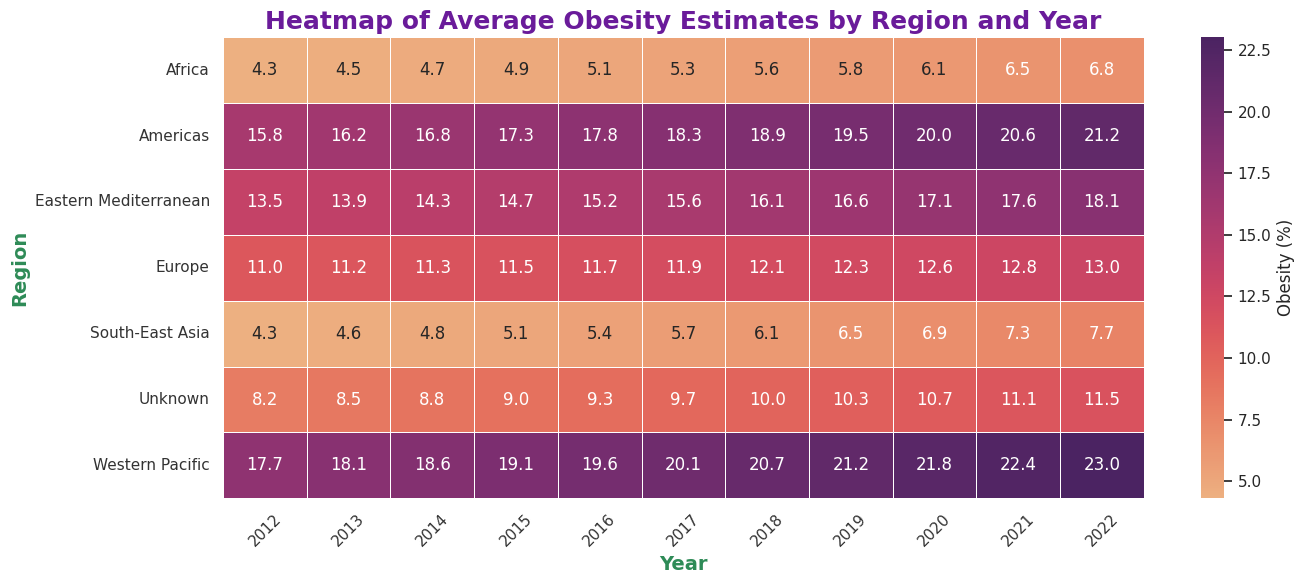

In [149]:
# Prepare pivot table for heatmap
heatmap_data = df_obesity.pivot_table(
    index='Region',
    columns='Year',
    values='Mean_Estimate',
    aggfunc='mean'
)

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap=sns.color_palette("flare", as_cmap=True),
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Obesity (%)'}
)

# Title styling using direct args (no fontdict)
plt.title(
    'Heatmap of Average Obesity Estimates by Region and Year',
    fontsize=18,
    fontweight='bold',
    color='#6A1B9A',
    fontfamily='sans-serif'
)

# Axis label styling
plt.ylabel('Region', fontsize=14, fontweight='bold', color='#2E8B57')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='#2E8B57')

# Ticks
plt.xticks(color='#333333', fontsize=11, rotation=45)
plt.yticks(color='#333333', fontsize=11, rotation=0)

plt.tight_layout()
plt.show()

**6) Gender Gap in Obesity Trends (MULTI-LINE CHART)**

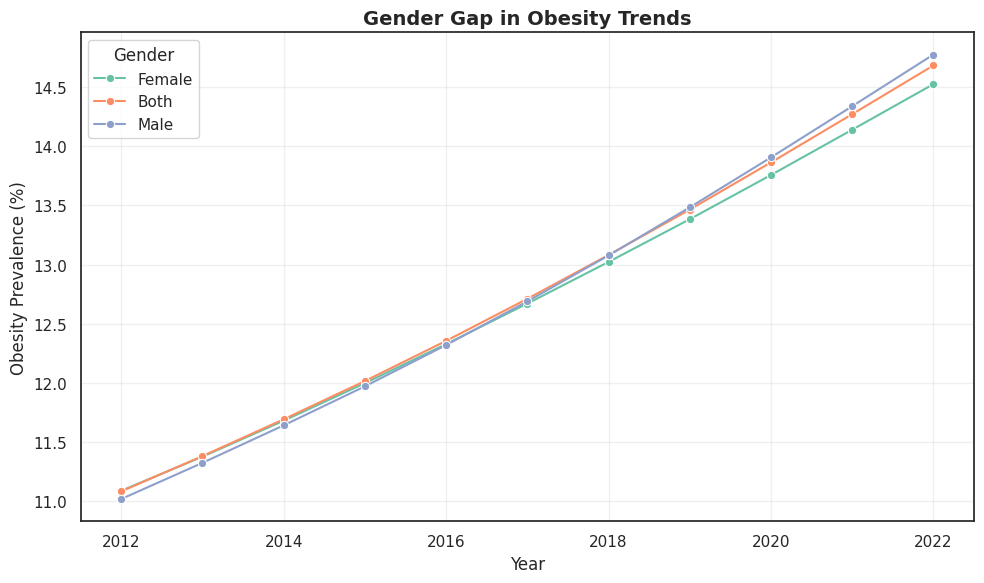

In [150]:
# Set theme
sns.set_theme(style="white", palette="Set2")

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_obesity,
    x="Year",
    y="Mean_Estimate",
    hue="Gender",
    estimator="mean",
    errorbar=None,
    marker="o",
    palette="Set2"
)

# Title and axis labels
plt.title("Gender Gap in Obesity Trends", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Obesity Prevalence (%)", fontsize=12)

# Legend and grid
plt.legend(title="Gender")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**7)Nutrition Paradox: Obesity vs. Malnutrition (Line Chart with Shaded Confidence Intervals)**

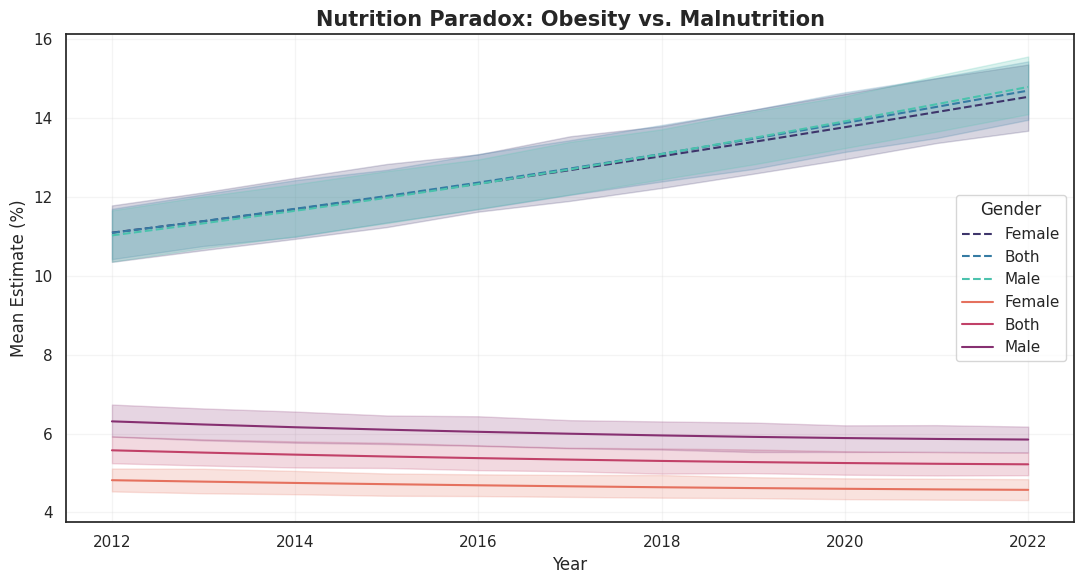

In [151]:
fig, ax = plt.subplots(figsize=(11, 6))

# Obesity Line
sns.lineplot(
    data=df_obesity,
    x="Year", y="Mean_Estimate", hue="Gender",
    estimator="mean", linestyle="--", palette="mako", ax=ax
)

# Malnutrition Line
sns.lineplot(
    data=df_malnutrition,
    x="Year", y="Mean_Estimate", hue="Gender",
    estimator="mean", palette="flare", ax=ax
)

plt.title("Nutrition Paradox: Obesity vs. Malnutrition", fontsize=15, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Estimate (%)", fontsize=12)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

**Step 4: MySQL Database Setup**

In [152]:
!pip install mysql-connector-python streamlit

In [153]:
!pip install mysql-connector-python

In [154]:
import mysql.connector  # For MySQL database operations
from mysql.connector import Error
import pandas as pd  # For data manipulation and analysis
import streamlit as st  # For building the interactive web app
from datetime import datetime, timedelta  # For handling dates and times
import sys

In [155]:
# Database configuration
db_connection = {
    'host': 'gateway01.ap-southeast-1.prod.aws.tidbcloud.com',
    'port': '4000',
    'user': '3EBy9M5V1fh5CGr.root',
    'password': 'B1NWDKr2YpsTNOyT',
}

# Connect to MySQL
connection = mysql.connector.connect(**db_connection)
cursor = connection.cursor()
print("Connected to MySQL!")

Connected to MySQL!


In [156]:
cursor.execute("CREATE DATABASE IF NOT EXISTS Nutrition_Paradox")
cursor.execute("USE Nutrition_Paradox")

In [157]:
# Create obesity table
cursor.execute("""
CREATE TABLE IF NOT EXISTS obesity (
    id INT AUTO_INCREMENT PRIMARY KEY,
    Year INT NOT NULL,
    Gender VARCHAR(10) NOT NULL,
    Mean_Estimate FLOAT NOT NULL,
    LowerBound FLOAT NOT NULL,
    UpperBound FLOAT NOT NULL,
    Age_Group VARCHAR(20) NOT NULL,
    Country VARCHAR(100) NOT NULL,
    Region VARCHAR(100),
    CI_Width FLOAT NOT NULL,
    obesity_level VARCHAR(10)
)
""")
connection.commit()
print("obesity table created!")

obesity table created!


In [158]:
# Create malnutirtion table
cursor.execute("""
CREATE TABLE IF NOT EXISTS malnutrition (
    id INT AUTO_INCREMENT PRIMARY KEY,
    Year INT NOT NULL,
    Gender VARCHAR(10) NOT NULL,
    Mean_Estimate FLOAT NOT NULL,
    LowerBound FLOAT NOT NULL,
    UpperBound FLOAT NOT NULL,
    Age_Group VARCHAR(20) NOT NULL,
    Country VARCHAR(100) NOT NULL,
    Region VARCHAR(100),
    CI_Width FLOAT NOT NULL,
    malnutrition_level VARCHAR(10)
)
""")
connection.commit()
print("malnutrirtion table created!")

malnutrirtion table created!


In [159]:
print(df_obesity.shape)
print(df_malnutrition.shape)

(27720, 10)
(27720, 10)


In [160]:
# Before insertion, clear existing data
cursor.execute("DELETE FROM obesity")
cursor.execute("DELETE FROM malnutrition")
connection.commit()
print("Cleared existing data from tables")

Cleared existing data from tables


In [161]:
def insert_data_iterrows(df, table_name, connection, cursor, commit_every=5000):
    """
    Improved insertion function with better error handling
    """
    print(f"Inserting into {table_name}...")

    # Make a copy to avoid modifying original dataframe
    df_insert = df.copy()

    # Ensure all numeric columns are properly handled
    numeric_cols = ['Mean_Estimate', 'LowerBound', 'UpperBound', 'CI_Width']
    for col in numeric_cols:
        if col in df_insert.columns:
            # Convert to float and handle None/NaN
            df_insert[col] = pd.to_numeric(df_insert[col], errors='coerce')
            df_insert[col] = df_insert[col].fillna(0.0)  # Fill with 0 instead of None

    # Handle other potential issues
    df_insert = df_insert.where(pd.notnull(df_insert), None)

    # Only exclude these columns
    excluded = ['id']  # Only exclude id column
    if 'created_at' in df_insert.columns:
        excluded.append('created_at')

    columns = [col for col in df_insert.columns if col not in excluded]

    column_names = ', '.join(columns)
    placeholders = ', '.join(['%s'] * len(columns))
    insert_query = f"INSERT INTO {table_name} ({column_names}) VALUES ({placeholders})"

    buffer = []
    inserted = 0
    errors = 0

    for idx, row in df_insert.iterrows():
        try:
            # Convert all values to appropriate types for SQL
            values = []
            for col in columns:
                val = row[col]
                if pd.isna(val) or val is None:
                    values.append(None)
                elif isinstance(val, (int, float)):
                    values.append(float(val))
                else:
                    values.append(str(val))

            buffer.append(tuple(values))

            # Commit in batches
            if len(buffer) >= commit_every:
                cursor.executemany(insert_query, buffer)
                connection.commit()
                inserted += len(buffer)
                print(f"{inserted} rows inserted into {table_name}...")
                buffer = []

        except Exception as e:
            errors += 1
            if errors < 10:  # Only show first 10 errors
                print(f"Row {idx} failed: {e}")
                print(f"Problematic values: {values}")
            continue

    # Insert remaining rows
    if buffer:
        try:
            cursor.executemany(insert_query, buffer)
            connection.commit()
            inserted += len(buffer)
        except Exception as e:
            print(f"Final batch failed: {e}")
            errors += len(buffer)

    print(f"Inserted {inserted} rows into '{table_name}' with {errors} errors")

In [162]:
# 1. First, clear existing data
cursor.execute("DELETE FROM obesity")
cursor.execute("DELETE FROM malnutrition")
connection.commit()

# 2. Verify your source data shape
print(f"Obesity DataFrame shape: {df_obesity.shape}")
print(f"Malnutrition DataFrame shape: {df_malnutrition.shape}")

# 3. Check for duplicates
print(f"Obesity duplicates: {df_obesity.duplicated().sum()}")
print(f"Malnutrition duplicates: {df_malnutrition.duplicated().sum()}")

# 4. Remove duplicates if any
df_obesity = df_obesity.drop_duplicates()
df_malnutrition = df_malnutrition.drop_duplicates()

# 5. Use the improved insertion function
insert_data_iterrows(df_obesity, 'obesity', connection, cursor)
insert_data_iterrows(df_malnutrition, 'malnutrition', connection, cursor)

Obesity DataFrame shape: (27720, 10)
Malnutrition DataFrame shape: (27720, 10)
Obesity duplicates: 0
Malnutrition duplicates: 0
Inserting into obesity...
5000 rows inserted into obesity...
10000 rows inserted into obesity...
15000 rows inserted into obesity...
20000 rows inserted into obesity...
25000 rows inserted into obesity...
Inserted 27720 rows into 'obesity' with 0 errors
Inserting into malnutrition...
5000 rows inserted into malnutrition...
10000 rows inserted into malnutrition...
15000 rows inserted into malnutrition...
20000 rows inserted into malnutrition...
25000 rows inserted into malnutrition...
Inserted 27720 rows into 'malnutrition' with 0 errors


In [163]:
cursor.execute("SELECT * FROM obesity")
data = cursor.fetchall()

# ✅ description will only work right after SELECT
columns = [i[0] for i in cursor.description]

import pandas as pd
df_obesity_sql = pd.DataFrame(data, columns=columns)
df_obesity_sql

,id,Year,Gender,Mean_Estimate,LowerBound,UpperBound,Age_Group,Country,Region,CI_Width,obesity_level
0,1110001,2012,Female,25.990646,19.781920,32.539630,Adult,North Macedonia,Europe,12.757711,Moderate
1,1110002,2020,Both,32.471634,27.618340,37.575893,Adult,Fiji,Western Pacific,9.957552,High
2,1110003,2020,Male,17.487640,15.793777,19.245728,Adult,"Iran, Islamic Republic of",Eastern Mediterranean,3.451950,Low
3,1110004,2020,Male,28.335530,23.089588,33.815334,Adult,Iraq,Eastern Mediterranean,10.725747,Moderate
4,1110005,2014,Female,27.948704,24.924767,31.213260,Adult,Greenland,Europe,6.288494,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
27715,1137716,2020,Both,1.475931,0.964176,2.197432,Child,Tajikistan,Europe,1.233256,Low
27716,1137717,2012,Female,1.966190,0.302039,5.872414,Child,Somalia,Eastern Mediterranean,5.570375,Low
27717,1137718,2021,Male,16.634888,3.325899,34.877815,Child,Vanuatu,Western Pacific,31.551916,Low
27718,1137719,2014,Male,2.032189,0.236481,6.341185,Child,Madagascar,Africa,6.104704,Low


In [164]:
df_obesity_sql.to_csv('final_obesity.csv', index=False)

In [165]:
cursor.execute("SELECT * FROM malnutrition")
data = cursor.fetchall()

#fetches the names of your columns in dataframe(cursor.description holds the columns info)
columns1 = [i[0] for i in cursor.description]

In [166]:
import pandas as pd
# using the result fetched in cursor, create a new dataframe
df_malnutrition_sql = pd.DataFrame(data,columns=columns1)

df_malnutrition_sql

,id,Year,Gender,Mean_Estimate,LowerBound,UpperBound,Age_Group,Country,Region,CI_Width,malnutrition_level
0,960001,2013,Female,0.256721,0.076958,0.633195,Adult,Tonga,Western Pacific,0.556237,Low
1,960002,2021,Female,5.795110,3.972036,8.077021,Adult,Gabon,Africa,4.104984,Low
2,960003,2017,Both,3.090652,2.428230,3.842155,Adult,Mongolia,Western Pacific,1.413925,Low
3,960004,2016,Female,8.371724,6.655668,10.253121,Adult,Sierra Leone,Africa,3.597453,Low
4,960005,2021,Both,13.336353,12.242323,14.442866,Adult,South-East Asia Region,Unknown,2.200543,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
27715,987716,2013,Female,4.140693,2.795499,5.714345,Child,Haiti,Americas,2.918846,Low
27716,987717,2018,Both,7.574986,5.428173,10.218395,Child,Tajikistan,Europe,4.790222,Low
27717,987718,2016,Both,1.703645,0.621721,3.507061,Child,Papua New Guinea,Western Pacific,2.885340,Low
27718,987719,2020,Female,0.734066,0.064152,2.810176,Child,Samoa,Western Pacific,2.746023,Low


In [167]:
df_malnutrition_sql.to_csv('final_malnutrition.csv', index=False)

In [168]:
from sqlalchemy import create_engine
import pandas as pd

# Create the SQLAlchemy engine
engine = create_engine(
    "mysql+mysqlconnector://3EBy9M5V1fh5CGr.root:B1NWDKr2YpsTNOyT@"
    "gateway01.ap-southeast-1.prod.aws.tidbcloud.com:4000/Nutrition_Paradox"
)

# Define reusable function
def show_query(query):
    df = pd.read_sql_query(query, engine)
    display(df)

In [169]:
results = cursor.fetchall()

**Step 5 : SQL Queries**

**Obesity Table (10 Queries)**

In [170]:
# Query 1: Top 5 regions with highest average obesity in 2022
query1 =("""
    SELECT Region, AVG(Mean_Estimate) AS avg_obesity
    FROM obesity
    WHERE Year = 2022
    GROUP BY Region
    ORDER BY avg_obesity DESC
    LIMIT 5
""")
show_query(query1)

,Region,avg_obesity
0,Western Pacific,23.009388
1,Americas,21.213601
2,Eastern Mediterranean,18.126910
3,Europe,12.987338
4,Unknown,11.462648


In [171]:
# Query 2: Top 5 countries with highest obesity estimates
query2 =("""
    SELECT Country, AVG(Mean_Estimate) AS avg_obesity
    FROM obesity
    GROUP BY Country
    ORDER BY avg_obesity DESC
    LIMIT 5
""")
show_query(query2)

,Country,avg_obesity
0,Niue,40.664873
1,Cook Islands,39.917173
2,Nauru,38.512100
3,Tokelau,37.960966
4,American Samoa,36.892015


In [172]:
# Query 3: Obesity trend in India over the years
query3 =("""
    SELECT Year, AVG(Mean_Estimate) AS obesity_rate
    FROM obesity
    WHERE Country = 'India'
    GROUP BY Year
    ORDER BY Year
""")
show_query(query3)

,Year,obesity_rate
0,2012,2.473178
1,2013,2.634653
2,2014,2.798749
3,2015,2.972813
4,2016,3.159576
5,2017,3.362175
6,2018,3.579292
7,2019,3.809013
8,2020,4.051149
9,2021,4.307816


In [173]:
# Query 4: Average obesity by gender
query4 =("""
    SELECT Gender, AVG(Mean_Estimate) AS avg_obesity
    FROM obesity
    GROUP BY Gender
    ORDER BY avg_obesity DESC
""")
show_query(query4)

,Gender,avg_obesity
0,Both,12.781969
1,Male,12.776696
2,Female,12.724456


In [174]:
# Query 5: Country count by obesity level category and age group
query5 =("""
    SELECT obesity_level, Age_Group, COUNT(DISTINCT Country) AS country_count
    FROM obesity
    GROUP BY obesity_level, Age_Group
    ORDER BY obesity_level, Age_Group
""")
show_query(query5)

,obesity_level,Age_Group,country_count
0,High,Adult,94
1,High,Child,11
2,Low,Adult,176
3,Low,Child,210
4,Moderate,Adult,99
5,Moderate,Child,26


In [175]:
# Query 6: Top 5 least reliable and most consistent countries by CI_Width
query6 =("""
    -- Least reliable (highest average CI_Width)
    (SELECT Country, AVG(CI_Width) AS avg_ci_width, 'Least Reliable' AS category
     FROM obesity
     GROUP BY Country
     ORDER BY avg_ci_width DESC
     LIMIT 5)
    UNION ALL
    -- Most consistent (lowest average CI_Width)
    (SELECT Country, AVG(CI_Width) AS avg_ci_width, 'Most Consistent' AS category
     FROM obesity
     GROUP BY Country
     ORDER BY avg_ci_width ASC
     LIMIT 5)
""")
show_query(query6)

,Country,avg_ci_width,category
0,Global,0.708953,Most Consistent
1,Low & Middle Income,0.861060,Most Consistent
2,South-East Asia Region,1.017775,Most Consistent
3,India,1.140133,Most Consistent
4,Japan,1.155903,Most Consistent
5,Bermuda,24.593417,Least Reliable
6,American Samoa,23.113530,Least Reliable
7,Antigua and Barbuda,22.016214,Least Reliable
8,Puerto Rico,21.698679,Least Reliable
9,Grenada,21.458487,Least Reliable


In [176]:
# Query 7: Average obesity by age group
query7 =("""
    SELECT Age_Group, AVG(Mean_Estimate) AS avg_obesity
    FROM obesity
    GROUP BY Age_Group
    ORDER BY avg_obesity DESC
""")
show_query(query7)

,Age_Group,avg_obesity
0,Adult,21.833223
1,Child,9.736979


In [177]:
# Query 8: Top 10 countries with consistent low obesity
query8 =("""
    SELECT Country, AVG(Mean_Estimate) AS avg_obesity, AVG(CI_Width) AS avg_ci_width
    FROM obesity
    GROUP BY Country
    HAVING avg_obesity < 15 AND avg_ci_width < 5
    ORDER BY avg_obesity ASC, avg_ci_width ASC
    LIMIT 10
""")
show_query(query8)

,Country,avg_obesity,avg_ci_width
0,Timor-Leste,0.994067,1.273569
1,Ethiopia,1.491994,1.589414
2,Burkina Faso,1.721496,1.531514
3,Rwanda,1.767194,2.360579
4,Bangladesh,1.976673,1.663506
5,Madagascar,1.984110,4.356885
6,Malawi,2.391324,2.632714
7,Nepal,2.494255,3.098051
8,Mozambique,2.772243,2.764629
9,Niger,3.080740,4.666968


In [178]:
# Query 9: Countries where female obesity exceeds male by large margin
query9 =("""
    SELECT o1.Country, o1.Year,
           o1.Mean_Estimate AS female_obesity,
           o2.Mean_Estimate AS male_obesity,
           (o1.Mean_Estimate - o2.Mean_Estimate) AS difference
    FROM obesity o1
    JOIN obesity o2 ON o1.Country = o2.Country AND o1.Year = o2.Year
    WHERE o1.Gender = 'Female'
      AND o2.Gender = 'Male'
      AND (o1.Mean_Estimate - o2.Mean_Estimate) > 5
    ORDER BY difference DESC
    LIMIT 10
""")
show_query(query9)

,Country,Year,female_obesity,male_obesity,difference
0,American Samoa,2012,76.98381,23.729610,53.254200
1,American Samoa,2012,76.98381,23.866493,53.117317
2,American Samoa,2012,76.98381,24.116910,52.866899
3,American Samoa,2013,77.29769,24.599234,52.698458
4,American Samoa,2013,77.29769,24.727380,52.570311
5,American Samoa,2013,77.29769,24.959866,52.337826
6,American Samoa,2014,77.64114,25.476849,52.164295
7,American Samoa,2014,77.64114,25.594288,52.046856
8,American Samoa,2014,77.64114,25.805530,51.835613
9,American Samoa,2015,78.00910,26.352562,51.656540


In [179]:
# Query 10: Global average obesity percentage per year
query10 =("""
    SELECT Year, AVG(Mean_Estimate) AS global_avg_obesity
    FROM obesity
    WHERE Country != 'Global' AND Region != 'Global'
    GROUP BY Year
    ORDER BY Year
""")
show_query(query10)

,Year,global_avg_obesity
0,2012,11.080331
1,2013,11.378235
2,2014,11.689180
3,2015,12.013306
4,2016,12.353225
5,2017,12.709545
6,2018,13.080049
7,2019,13.464540
8,2020,13.863121
9,2021,14.271217


**Malnutrition Table (10 Queries)**

In [180]:
# Query 1: Average malnutrition by age group
query11 =("""
    SELECT Age_Group, AVG(Mean_Estimate) AS avg_malnutrition
    FROM malnutrition
    GROUP BY Age_Group
    ORDER BY avg_malnutrition DESC
""")
show_query(query11)

,Age_Group,avg_malnutrition
0,Adult,5.940619
1,Child,5.159062


In [181]:
# Query 2: Top 5 countries with highest malnutrition
query12 =("""
    SELECT Country, AVG(Mean_Estimate) AS avg_malnutrition
    FROM malnutrition
    GROUP BY Country
    ORDER BY avg_malnutrition DESC
    LIMIT 5
""")
show_query(query12)

,Country,avg_malnutrition
0,India,22.142361
1,South-East Asia Region,19.238903
2,Bangladesh,18.245768
3,Sri Lanka,17.871907
4,Eritrea,17.472508


In [182]:
# Query 3: Malnutrition trend in African region over the years
query13 =("""
    SELECT Year, AVG(Mean_Estimate) AS malnutrition_rate
    FROM malnutrition
    WHERE Region = 'Africa'
    GROUP BY Year
    ORDER BY Year
""")
show_query(query13)

,Year,malnutrition_rate
0,2012,8.849655
1,2013,8.749857
2,2014,8.662762
3,2015,8.587719
4,2016,8.523125
5,2017,8.466465
6,2018,8.414722
7,2019,8.369700
8,2020,8.331320
9,2021,8.298626


In [183]:
# Query 4: Gender-based average malnutrition
query14 =("""
    SELECT Gender, AVG(Mean_Estimate) AS avg_malnutrition
    FROM malnutrition
    GROUP BY Gender
    ORDER BY avg_malnutrition DESC
""")
show_query(query14)

,Gender,avg_malnutrition
0,Male,6.026317
1,Both,5.361553
2,Female,4.675483


In [184]:
# Query 5: Malnutrition level-wise average CI_Width by age group
query15 =("""
    SELECT malnutrition_level, Age_Group, AVG(CI_Width) AS avg_ci_width
    FROM malnutrition
    GROUP BY malnutrition_level, Age_Group
    ORDER BY malnutrition_level, Age_Group
""")
show_query(query15)

,malnutrition_level,Age_Group,avg_ci_width
0,High,Adult,9.253292
1,High,Child,7.876140
2,Low,Adult,2.635897
3,Low,Child,4.437167
4,Moderate,Adult,7.639442
5,Moderate,Child,9.891132


In [185]:
# Query 6: Yearly malnutrition change in specific countries
query16 =("""
    SELECT Country, Year, Mean_Estimate AS malnutrition_rate,
           LAG(Mean_Estimate) OVER (PARTITION BY Country ORDER BY Year) AS prev_year_rate,
           Mean_Estimate - LAG(Mean_Estimate) OVER (PARTITION BY Country ORDER BY Year) AS year_change
    FROM malnutrition
    WHERE Country IN ('India', 'Nigeria', 'Brazil')
    ORDER BY Country, Year
""")
show_query(query16)

,Country,Year,malnutrition_rate,prev_year_rate,year_change
0,Brazil,2012,2.691234,NaN,NaN
1,Brazil,2012,3.027895,2.691234,0.336661
2,Brazil,2012,4.151142,3.027895,1.123246
3,Brazil,2012,2.582618,4.151142,-1.568524
4,Brazil,2012,2.497541,2.582618,-0.085076
...,...,...,...,...,...
391,Nigeria,2022,18.538181,9.595276,8.942905
392,Nigeria,2022,9.605037,18.538181,-8.933145
393,Nigeria,2022,9.593839,9.605037,-0.011198
394,Nigeria,2022,9.408734,9.593839,-0.185104


In [186]:
# Query 7: Regions with lowest malnutrition averages
query17 =("""
    SELECT Region, AVG(Mean_Estimate) AS avg_malnutrition
    FROM malnutrition
    GROUP BY Region
    ORDER BY avg_malnutrition ASC
    LIMIT 5
""")
show_query(query17)

,Region,avg_malnutrition
0,Europe,2.426759
1,Americas,3.174752
2,Western Pacific,3.220453
3,Eastern Mediterranean,6.661349
4,Unknown,8.354200


In [187]:
# Query 8: Countries with increasing malnutrition
query18 =("""
    SELECT Country,
           MIN(Mean_Estimate) AS min_malnutrition,
           MAX(Mean_Estimate) AS max_malnutrition,
           (MAX(Mean_Estimate) - MIN(Mean_Estimate)) AS increase
    FROM malnutrition
    GROUP BY Country
    HAVING increase > 0
    ORDER BY increase DESC
    LIMIT 10
""")
show_query(query18)

,Country,min_malnutrition,max_malnutrition,increase
0,Eritrea,7.868055,35.894115,28.026060
1,Ethiopia,7.553969,29.304049,21.750079
2,Somalia,4.688896,25.521730,20.832835
3,India,13.073501,31.900835,18.827334
4,Pakistan,8.213687,25.950594,17.736907
5,Central African Republic,6.204490,23.682750,17.478261
6,Timor-Leste,10.267492,27.619478,17.351986
7,Bangladesh,11.223906,27.458560,16.234655
8,Burkina Faso,3.599201,19.764174,16.164973
9,Madagascar,5.191616,21.325958,16.134342


In [188]:
# Query 9: Min/Max malnutrition levels year-wise comparison
query19 =("""
    SELECT Year,
           MIN(Mean_Estimate) AS min_malnutrition,
           MAX(Mean_Estimate) AS max_malnutrition,
           AVG(Mean_Estimate) AS avg_malnutrition
    FROM malnutrition
    GROUP BY Year
    ORDER BY Year
""")
show_query(query19)

,Year,min_malnutrition,max_malnutrition,avg_malnutrition
0,2012,0.175309,35.894115,5.566638
1,2013,0.176421,35.694363,5.508852
2,2014,0.177772,35.498200,5.457066
3,2015,0.178445,35.312954,5.410764
4,2016,0.178804,35.147690,5.369360
5,2017,0.179286,34.997906,5.332161
6,2018,0.179796,34.856236,5.298487
7,2019,0.180428,34.715996,5.269581
8,2020,0.181989,34.578445,5.245665
9,2021,0.184717,34.429226,5.226826


In [189]:
# Query 10: High CI_Width flags for monitoring
query20 =("""
    SELECT Country, Year, Gender, Age_Group, Mean_Estimate, CI_Width
    FROM malnutrition
    WHERE CI_Width > 5
    ORDER BY CI_Width DESC
    LIMIT 20
""")
show_query(query20)

,Country,Year,Gender,Age_Group,Mean_Estimate,CI_Width
0,Senegal,2022,Male,Child,16.941770,26.701744
1,Senegal,2021,Male,Child,16.992039,25.679344
2,Senegal,2020,Male,Child,17.046429,24.586365
3,Mauritania,2022,Male,Child,16.080868,23.810543
4,Senegal,2019,Male,Child,17.105950,23.466898
5,Equatorial Guinea,2022,Male,Adult,14.014831,23.417751
6,Senegal,2022,Male,Child,24.021805,23.389660
7,Senegal,2022,Male,Child,21.375696,23.368835
8,Somalia,2022,Male,Adult,25.521730,23.081330
9,Gambia,2022,Male,Child,12.849383,23.012806


 **Combined (5 Queries)**

In [190]:
# Query 1: Obesity vs malnutrition comparison by country
query21 =("""
    SELECT o.Country,
           AVG(o.Mean_Estimate) AS avg_obesity,
           AVG(m.Mean_Estimate) AS avg_malnutrition
    FROM obesity o
    JOIN malnutrition m ON o.Country = m.Country AND o.Year = m.Year AND o.Gender = m.Gender
    WHERE o.Country IN ('United States', 'India', 'China', 'Brazil', 'Nigeria')
    GROUP BY o.Country
    ORDER BY avg_obesity DESC
""")
show_query(query21)

,Country,avg_obesity,avg_malnutrition
0,United States,25.244768,1.298499
1,Brazil,16.613028,2.685355
2,China,8.621578,4.319780
3,Nigeria,4.467604,11.889187
4,India,3.429781,22.142361


In [191]:
# Query 2: Gender-based disparity in both obesity and malnutrition
query22 =("""
    SELECT o.Gender,
           AVG(o.Mean_Estimate) AS avg_obesity,
           AVG(m.Mean_Estimate) AS avg_malnutrition
    FROM obesity o
    JOIN malnutrition m ON o.Country = m.Country AND o.Year = m.Year AND o.Gender = m.Gender
    GROUP BY o.Gender
    ORDER BY o.Gender
""")
show_query(query22)

,Gender,avg_obesity,avg_malnutrition
0,Both,12.781969,5.361553
1,Female,12.724456,4.675483
2,Male,12.776696,6.026317


In [192]:
# Query 3: Region-wise avg estimates side-by-side (Africa and Americas)
query23 =("""
    SELECT 'Obesity' AS metric, Region, AVG(Mean_Estimate) AS avg_value
    FROM obesity
    WHERE Region IN ('Africa', 'Americas Region')
    GROUP BY Region
    UNION ALL
    SELECT 'Malnutrition' AS metric, Region, AVG(Mean_Estimate) AS avg_value
    FROM malnutrition
    WHERE Region IN ('Africa', 'Americas Region')
    GROUP BY Region
    ORDER BY Region, metric
""")
show_query(query23)

,metric,Region,avg_value
0,Malnutrition,Africa,8.502186
1,Obesity,Africa,5.415204


In [193]:
# Query 4: Countries with obesity up & malnutrition down
query24 =("""
    WITH obesity_trend AS (
        SELECT Country,
               MAX(CASE WHEN Year = 2012 THEN Mean_Estimate END) AS obesity_2012,
               MAX(CASE WHEN Year = 2022 THEN Mean_Estimate END) AS obesity_2022
        FROM obesity
        WHERE Year IN (2012, 2022)
        GROUP BY Country
    ),
    malnutrition_trend AS (
        SELECT Country,
               MAX(CASE WHEN Year = 2012 THEN Mean_Estimate END) AS malnutrition_2012,
               MAX(CASE WHEN Year = 2022 THEN Mean_Estimate END) AS malnutrition_2022
        FROM malnutrition
        WHERE Year IN (2012, 2022)
        GROUP BY Country
    )
    SELECT o.Country,
           o.obesity_2012, o.obesity_2022, (o.obesity_2022 - o.obesity_2012) AS obesity_change,
           m.malnutrition_2012, m.malnutrition_2022, (m.malnutrition_2022 - m.malnutrition_2012) AS malnutrition_change
    FROM obesity_trend o
    JOIN malnutrition_trend m ON o.Country = m.Country
    WHERE (o.obesity_2022 - o.obesity_2012) > 0
      AND (m.malnutrition_2022 - m.malnutrition_2012) < 0
    ORDER BY obesity_change DESC
    LIMIT 10
""")
show_query(query24)

,Country,obesity_2012,obesity_2022,obesity_change,malnutrition_2012,malnutrition_2022,malnutrition_change
0,Afghanistan,10.703136,21.790806,11.087669,15.949234,10.322681,-5.626553
1,Jamaica,38.084560,48.829838,10.745277,5.142319,5.027545,-0.114774
2,Eswatini,30.398937,41.031845,10.632908,6.109731,5.478451,-0.631280
3,Brazil,22.189507,32.540627,10.351120,4.151142,2.984553,-1.166588
4,Pakistan,14.620960,24.544821,9.923861,25.950594,21.160601,-4.789993
5,Mauritania,23.187521,32.739838,9.552317,17.055698,16.080868,-0.974831
6,Oman,29.179108,38.709358,9.530251,8.964126,6.713379,-2.250746
7,Saint Vincent and the Grenadines,39.266239,48.772591,9.506351,4.374086,3.964178,-0.409909
8,Croatia,27.240877,36.733429,9.492552,2.601049,2.118927,-0.482122
9,"Bolivia, Plurinational State of",23.753960,33.120960,9.367001,2.670355,1.869689,-0.800666


In [194]:
# Query 5: Age-wise trend analysis
query25 =("""
    SELECT 'Obesity' AS metric, Age_Group, AVG(Mean_Estimate) AS avg_value
    FROM obesity
    GROUP BY Age_Group
    UNION ALL
    SELECT 'Malnutrition' AS metric, Age_Group, AVG(Mean_Estimate) AS avg_value
    FROM malnutrition
    GROUP BY Age_Group
    ORDER BY metric, Age_Group
""")
show_query(query25)

,metric,Age_Group,avg_value
0,Malnutrition,Adult,5.940619
1,Malnutrition,Child,5.159062
2,Obesity,Adult,21.833223
3,Obesity,Child,9.736979


**Step 6: Power BI Visualization**

**Connect SQL database to Power BI, load both the obesity_data and malnutrition_data tables, and use them to develop an interactive dashboard.**